In [1]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

- 구름
  - HCDC : High Cloud Cover (%)  0
  - LCDC : Low Cloud Cover (%)    0
  - MCDC : Medium Cloud Cover (%)   0
  - TCAR :TOTAL CLOUD AMOUNT RANDOM OVERLAP
    
- 바람    
  - MXGUST : Maximum Wind Speed at 0 m above ground (m/s)   0
  - N50MU : 50 METRE WIND U-COMPONENT (m/s)
  - N50MV: 50 METRE WIND V-COMPONENT (m/s)
  - UGRD : U-Component of Wind at 10 m above ground
  - VGRD : V-Component of Wind at 10 m above ground

- 습도    
  - RH   0 
  - SPFH 
  
- 온도, 열
  - TMAX : Maximum Temperature at 1.5 m above ground
  - TMIN : Minimum Temperature at 1.5 m above ground
  - TMP : Temperature at 1.5 m above ground
  - NDNSW : NET DOWN SURFACE SW FLUX (지표면 장파복사열)
  - TDSWS : TOTAL DOWNWARD SURFACE SW FLUX
  - SWDIF : DIFFUSE SW FLUX (ON RHO LEVELS) at 2 m above ground
  - SWDIR : DIRECT SW FLUX (ON RHO LEVELS) at 2 m above ground

    
  - PRES : Pressure
  - PRMSL : PRMSL_meansealevel(해수면변화 측정)
  - DPT : 태양열의 흡수와 열교환을 목적으로 사용
  - VIS : Visibility at 1.5 m above ground(가시성)  0
  - NCPCP : Large-Scale Precipitation (non-convective) 대규모 강수량  0 
  - SNOL : Large-Scale Snow   0 

In [2]:
data = pd.read_csv('./data/사전과제_data(대외비).csv')
data.head()

,datetime,Power,DPT,HCDC,LCDC,MCDC,MXGUST,N50MU,N50MV,NCPCP,NDNSW,PRES,PRMSL,RH,SNOL,SPFH,SWDIF,SWDIR,TCAR,TDSWS,TMAX,TMIN,TMP,UGRD,VGRD,VIS
0,2019-06-28 0:00,0.0,292.83881,0.000000,0.208588,0.221466,3.682800,1.847509,2.763273,0.0,0.0,100128.39,100154.00,95.563927,0.0,0.014404,0.0,0.0,0.820679,0.0,293.55634,293.53430,293.66138,0.807296,2.454707,5253.2329
1,2019-06-28 1:00,0.0,292.88571,0.064789,0.278748,0.198456,5.553069,1.899890,4.664735,0.0,0.0,100141.63,100167.02,96.102135,0.0,0.014404,0.0,0.0,0.888611,0.0,293.57761,293.55603,293.68283,0.529665,4.009634,4458.9321
2,2019-06-28 2:00,0.0,293.00406,0.065216,0.411865,0.271515,6.369141,1.295991,5.426573,0.0,0.0,100132.73,100158.17,97.152420,0.0,0.014641,0.0,0.0,0.987091,0.0,293.55991,293.45306,293.72989,-0.389507,4.696301,3831.2681
3,2019-06-28 3:00,0.0,293.04767,0.015625,0.333740,0.180115,6.471650,0.326472,5.467535,0.0,0.0,100121.87,100148.17,97.398071,0.0,0.014649,0.0,0.0,0.987091,0.0,293.47855,293.45660,293.70828,-0.388263,4.385302,3789.1816
4,2019-06-28 4:00,0.0,293.06934,0.093750,0.294647,0.052338,6.159808,0.068942,5.358360,0.0,0.0,100135.45,100161.19,97.384186,0.0,0.014648,0.0,0.0,0.974213,0.0,293.47440,293.45651,293.68655,-0.329056,4.479684,4061.2871


In [3]:
data['datetime']=pd.to_datetime(data['datetime'])

In [4]:
# datetime을 인덱스로
data.set_index('datetime', inplace=True)

In [5]:
data.head()

,Power,DPT,HCDC,LCDC,MCDC,MXGUST,N50MU,N50MV,NCPCP,NDNSW,PRES,PRMSL,RH,SNOL,SPFH,SWDIF,SWDIR,TCAR,TDSWS,TMAX,TMIN,TMP,UGRD,VGRD,VIS
datetime,,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-28 00:00:00,0.0,292.83881,0.000000,0.208588,0.221466,3.682800,1.847509,2.763273,0.0,0.0,100128.39,100154.00,95.563927,0.0,0.014404,0.0,0.0,0.820679,0.0,293.55634,293.53430,293.66138,0.807296,2.454707,5253.2329
2019-06-28 01:00:00,0.0,292.88571,0.064789,0.278748,0.198456,5.553069,1.899890,4.664735,0.0,0.0,100141.63,100167.02,96.102135,0.0,0.014404,0.0,0.0,0.888611,0.0,293.57761,293.55603,293.68283,0.529665,4.009634,4458.9321
2019-06-28 02:00:00,0.0,293.00406,0.065216,0.411865,0.271515,6.369141,1.295991,5.426573,0.0,0.0,100132.73,100158.17,97.152420,0.0,0.014641,0.0,0.0,0.987091,0.0,293.55991,293.45306,293.72989,-0.389507,4.696301,3831.2681
2019-06-28 03:00:00,0.0,293.04767,0.015625,0.333740,0.180115,6.471650,0.326472,5.467535,0.0,0.0,100121.87,100148.17,97.398071,0.0,0.014649,0.0,0.0,0.987091,0.0,293.47855,293.45660,293.70828,-0.388263,4.385302,3789.1816
2019-06-28 04:00:00,0.0,293.06934,0.093750,0.294647,0.052338,6.159808,0.068942,5.358360,0.0,0.0,100135.45,100161.19,97.384186,0.0,0.014648,0.0,0.0,0.974213,0.0,293.47440,293.45651,293.68655,-0.329056,4.479684,4061.2871


In [6]:
data.describe()

,Power,DPT,HCDC,LCDC,MCDC,MXGUST,N50MU,N50MV,NCPCP,NDNSW,PRES,PRMSL,RH,SNOL,SPFH,SWDIF,SWDIR,TCAR,TDSWS,TMAX,TMIN,TMP,UGRD,VGRD,VIS
count,22662.000000,22494.000000,22494.000000,22494.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000
mean,10480.569321,282.608439,0.298232,0.311569,0.226534,8.514256,1.703122,-0.497501,0.144576,163.955344,101572.642926,101604.898699,77.585871,0.001651,0.008702,63.394058,114.321061,0.693976,177.676412,286.802096,286.399237,288.528413,0.924964,-0.965852,24713.720017
std,16256.016690,9.512896,0.370127,0.371906,0.355870,4.689025,4.653624,5.370105,1.404132,245.436310,862.941092,863.646625,13.563617,0.033077,0.005173,90.200236,208.266613,0.407181,263.125027,8.456487,8.491048,7.353683,3.695723,4.445996,16993.617704
min,0.000000,257.834350,0.000000,0.000000,0.000000,0.789551,-21.822517,-21.447340,0.000000,0.000000,97939.086000,97964.180000,30.477089,0.000000,0.001178,0.000000,0.000000,0.000000,0.000000,267.138550,266.406220,275.928280,-18.615330,-18.573994,19.106869
25%,0.000000,274.923080,0.000000,0.000000,0.000000,5.037655,-1.135010,-4.172215,0.000000,0.000000,100903.970000,100934.805000,66.815433,0.000000,0.004302,0.000000,0.000000,0.278564,0.000000,279.522335,279.146572,281.285500,-1.444218,-3.791789,11360.670250
50%,0.000000,282.326445,0.062500,0.101593,0.000000,7.480424,1.527756,-0.938543,0.000000,5.501953,101636.750000,101677.805000,78.428546,0.000000,0.007131,5.524490,0.000000,0.982147,6.096680,287.079695,286.631680,288.640670,0.743261,-1.337835,21077.447500
75%,16985.587750,291.457975,0.593750,0.630463,0.380135,10.870264,4.403746,2.647588,0.000000,272.998857,102239.610000,102270.630000,88.971813,0.000000,0.013141,99.369844,130.015625,1.000000,301.744157,294.685203,294.326908,295.536107,3.159547,1.662547,34966.373750
max,63475.351000,299.287320,1.000006,1.000000,1.000000,38.869167,25.704344,30.286469,54.830078,980.527830,103644.550000,103673.340000,104.500310,2.016602,0.021400,529.763610,936.984380,1.000008,1035.399200,304.775630,304.524960,302.365600,19.557364,25.152510,93041.609000


## 결측치 처리하기
- 대치법(평균, 특정한값, 이전값, 이후 값)
- 삭제
- 보간법(기하학적인 행동에 제한하여 누락된 데이터 값을 결정
   - 선형보간 
       - 누락된 데이터가 주변 데이터에 선형적인 일관성을 갖도록 제한
       - 시간에 따라 시스템이 동작하는 방식을 알고 있을 때 유용(연도에 따른 온도변화에 대한 추세 알고 있을 떄)

In [7]:
# 결측치 조회
data.isna().sum()

Power       0
DPT       168
HCDC      168
LCDC      168
MCDC      192
MXGUST    192
N50MU     192
N50MV     192
NCPCP     192
NDNSW     192
PRES      192
PRMSL     192
RH        192
SNOL      192
SPFH      192
SWDIF     192
SWDIR     192
TCAR      192
TDSWS     192
TMAX      192
TMIN      192
TMP       192
UGRD      192
VGRD      192
VIS       192
dtype: int64

In [8]:
#선형보간법
from scipy import interpolate
data=data.interpolate(method="linear")

In [9]:
#결측치 해결
data.isna().sum()

Power     0
DPT       0
HCDC      0
LCDC      0
MCDC      0
MXGUST    0
N50MU     0
N50MV     0
NCPCP     0
NDNSW     0
PRES      0
PRMSL     0
RH        0
SNOL      0
SPFH      0
SWDIF     0
SWDIR     0
TCAR      0
TDSWS     0
TMAX      0
TMIN      0
TMP       0
UGRD      0
VGRD      0
VIS       0
dtype: int64

In [10]:
data.describe()

,Power,DPT,HCDC,LCDC,MCDC,MXGUST,N50MU,N50MV,NCPCP,NDNSW,PRES,PRMSL,RH,SNOL,SPFH,SWDIF,SWDIR,TCAR,TDSWS,TMAX,TMIN,TMP,UGRD,VGRD,VIS
count,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000
mean,10480.569321,282.613203,0.298466,0.312431,0.226684,8.522978,1.719405,-0.520225,0.143352,162.566260,101573.625019,101605.840526,77.539134,0.001637,0.008703,62.856962,113.352495,0.695344,176.171078,286.807468,286.404303,288.538701,0.935677,-0.985685,24737.154847
std,16256.016690,9.519852,0.370125,0.372057,0.355199,4.681217,4.652569,5.357747,1.398234,244.855923,863.448116,864.152104,13.535794,0.032937,0.005181,90.005053,207.646991,0.406331,262.513584,8.460699,8.495088,7.357904,3.699873,4.436807,16954.767573
min,0.000000,257.834350,0.000000,0.000000,0.000000,0.789551,-21.822517,-21.447340,0.000000,0.000000,97939.086000,97964.180000,30.477089,0.000000,0.001178,0.000000,0.000000,0.000000,0.000000,267.138550,266.406220,275.928280,-18.615330,-18.573994,19.106869
25%,0.000000,274.893690,0.000000,0.000000,0.000000,5.037655,-1.123986,-4.185865,0.000000,0.000000,100903.970000,100934.805000,66.779451,0.000000,0.004267,0.000000,0.000000,0.284393,0.000000,279.540487,279.168550,281.341093,-1.441672,-3.806664,11440.719500
50%,0.000000,282.307465,0.062500,0.103851,0.000000,7.497317,1.539925,-0.975609,0.000000,4.441895,101640.110000,101681.695000,78.326630,0.000000,0.007121,4.396240,0.000000,0.982086,4.900391,287.058275,286.601655,288.607805,0.752693,-1.360119,21129.002000
75%,16985.587750,291.481825,0.593750,0.634148,0.379662,10.925629,4.438017,2.597841,0.000000,269.275047,102243.747500,102274.007500,88.885521,0.000000,0.013141,98.855202,126.611328,1.000000,297.518740,294.705803,294.353142,295.556657,3.183374,1.632480,35002.008750
max,63475.351000,299.287320,1.000006,1.000000,1.000000,38.869167,25.704344,30.286469,54.830078,980.527830,103644.550000,103673.340000,104.500310,2.016602,0.021400,529.763610,936.984380,1.000008,1035.399200,304.775630,304.524960,302.365600,19.557364,25.152510,93041.609000


다중 선형회귀로 

In [11]:
target=data[['Power']]

In [12]:
x_data = data[[ 'DPT', 'HCDC', 'LCDC', 'MCDC', 'MXGUST', 'N50MU',
       'N50MV', 'NCPCP', 'NDNSW', 'PRES', 'PRMSL', 'RH', 'SNOL', 'SPFH',
       'SWDIF', 'SWDIR', 'TCAR', 'TDSWS', 'TMAX', 'TMIN', 'TMP', 'UGRD',
       'VGRD', 'VIS']]
x_data.head()

,DPT,HCDC,LCDC,MCDC,MXGUST,N50MU,N50MV,NCPCP,NDNSW,PRES,PRMSL,RH,SNOL,SPFH,SWDIF,SWDIR,TCAR,TDSWS,TMAX,TMIN,TMP,UGRD,VGRD,VIS
datetime,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-28 00:00:00,292.83881,0.000000,0.208588,0.221466,3.682800,1.847509,2.763273,0.0,0.0,100128.39,100154.00,95.563927,0.0,0.014404,0.0,0.0,0.820679,0.0,293.55634,293.53430,293.66138,0.807296,2.454707,5253.2329
2019-06-28 01:00:00,292.88571,0.064789,0.278748,0.198456,5.553069,1.899890,4.664735,0.0,0.0,100141.63,100167.02,96.102135,0.0,0.014404,0.0,0.0,0.888611,0.0,293.57761,293.55603,293.68283,0.529665,4.009634,4458.9321
2019-06-28 02:00:00,293.00406,0.065216,0.411865,0.271515,6.369141,1.295991,5.426573,0.0,0.0,100132.73,100158.17,97.152420,0.0,0.014641,0.0,0.0,0.987091,0.0,293.55991,293.45306,293.72989,-0.389507,4.696301,3831.2681
2019-06-28 03:00:00,293.04767,0.015625,0.333740,0.180115,6.471650,0.326472,5.467535,0.0,0.0,100121.87,100148.17,97.398071,0.0,0.014649,0.0,0.0,0.987091,0.0,293.47855,293.45660,293.70828,-0.388263,4.385302,3789.1816
2019-06-28 04:00:00,293.06934,0.093750,0.294647,0.052338,6.159808,0.068942,5.358360,0.0,0.0,100135.45,100161.19,97.384186,0.0,0.014648,0.0,0.0,0.974213,0.0,293.47440,293.45651,293.68655,-0.329056,4.479684,4061.2871


In [13]:
x_data1 = sm.add_constant(x_data, has_constant='add')

multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()

In [14]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     3084.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:43:08   Log-Likelihood:            -2.3544e+05
No. Observations:               22662   AIC:                         4.709e+05
Df Residuals:                   22637   BIC:                         4.711e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.889e+04   1.46e+04     -4.027      0.000   -8.76e+04   -3.02e+04
DPT         3044.9736    153.498     19.837      0.000    2744.107    3345.840
HCDC          91.1538    203.008      0.449      0.653    -306.756     489.064
LCDC        2886.4995    212.938     13.556      0.000    2469.126    3303.873
MCDC        1192.3495    186.977      6.377      0.000     825.862    1558.837
MXGUST       -98.2256     16.795     -5.849      0.000    -131.144     -65.307
N50MU       -422.0110     52.764     -7.998      0.000    -525.433    -318.589
N50MV        -77.3760     48.023     -1.611      0.107    -171.505      16.753
NCPCP        186.0105     40.739      4.566      0.000     106.160     265.861
NDNSW         10.0955      9.877      1.022      0.307      -9.264      29.455
PRES           2.8350      2.414      1.174      0.240      -1.897       7.567
PRMSL         -1.7685      2.419     -0.731      0.465      -6.511       2.973
RH          -625.8009     29.839    -20.972      0.000    -684.288    -567.313
SNOL        2077.2406   1630.412      1.274      0.203   -1118.478    5272.960
SPFH        2.769e+04   4.63e+04      0.598      0.550   -6.31e+04    1.18e+05
SWDIF        198.2670    166.892      1.188      0.235    -128.852     525.386
SWDIR        187.6816    166.992      1.124      0.261    -139.634     514.997
TCAR       -2774.4687    211.290    -13.131      0.000   -3188.612   -2360.325
TDSWS       -146.3436    167.099     -0.876      0.381    -473.869     181.182
TMAX          17.7795    178.918      0.099      0.921    -332.913     368.472
TMIN       -3562.0306    171.030    -20.827      0.000   -3897.262   -3226.799
TMP          539.6971     31.963     16.885      0.000     477.048     602.346
UGRD         256.5712     66.505      3.858      0.000     126.217     386.925
VGRD         140.7091     57.977      2.427      0.015      27.070     254.348
VIS            0.0292      0.004      6.941      0.000       0.021       0.037
==============================================================================
Omnibus:                     2704.361   Durbin-Watson:                   0.422
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10910.581
Skew:                           0.547   Prob(JB):                         0.00
Kurtosis:                       6.218   Cond. No.                     1.30e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p-value > 0.05 이상 유의하지 않음

다중공선성 Vif와 Correlation 지표 사용

VIF 수치 10이상 또는 Correlation 값이 0.8이상이면 다중공선성이 있다고 판단되는데, 그림에서 TARGET 변수의 VIF 값과 Correlation 값이 모두 기준보다 큰 값들이 도출됨을 알 수 있다.

이 말은, 과거의 Target값이 다른 변수인 풍속(WS)이나 일사량(DNI)과의 관계에 있어 좋게 작용하기 때문에 미래의 발전량이 과대적합이 되어 프로젝트에서 원하는 정확한 예측값보다 무조건 적으로 좋은 값이 나오게 된다. 그래서 TARGET 변수를 제외한 5개의 변수를 독립변수로 우선 결정했다.

feature들을 살펴보니 구름, 바람. 습도, 온도, 기압 등 분류를 할 수 있더라 서로 연관이 많은 자료들
vif를 살펴보니 다중공선성이 크더라 그래서 카테고리중 vif높은것 제거 할거다 

In [15]:
data_cloud = data[['Power',"HCDC", "LCDC", "MCDC", "TCAR"]]
data_cloud.head()

,Power,HCDC,LCDC,MCDC,TCAR
datetime,,,,,
2019-06-28 00:00:00,0.0,0.000000,0.208588,0.221466,0.820679
2019-06-28 01:00:00,0.0,0.064789,0.278748,0.198456,0.888611
2019-06-28 02:00:00,0.0,0.065216,0.411865,0.271515,0.987091
2019-06-28 03:00:00,0.0,0.015625,0.333740,0.180115,0.987091
2019-06-28 04:00:00,0.0,0.093750,0.294647,0.052338,0.974213


In [16]:
vif_cloud=pd.DataFrame()
vif_cloud["VIF Factor"]=[variance_inflation_factor(data_cloud.values, i) 
                        for i in range(data_cloud.shape[1])]
vif_cloud['features'] = data_cloud.columns
vif_cloud

,VIF Factor,features
0,1.212167,Power
1,3.091291,HCDC
2,2.979852,LCDC
3,1.995713,MCDC
4,6.087622,TCAR


In [17]:
data_wind = data[['Power','MXGUST',"N50MU", "N50MV", "UGRD", "VGRD"]]
data_wind.head()

,Power,MXGUST,N50MU,N50MV,UGRD,VGRD
datetime,,,,,,
2019-06-28 00:00:00,0.0,3.682800,1.847509,2.763273,0.807296,2.454707
2019-06-28 01:00:00,0.0,5.553069,1.899890,4.664735,0.529665,4.009634
2019-06-28 02:00:00,0.0,6.369141,1.295991,5.426573,-0.389507,4.696301
2019-06-28 03:00:00,0.0,6.471650,0.326472,5.467535,-0.388263,4.385302
2019-06-28 04:00:00,0.0,6.159808,0.068942,5.358360,-0.329056,4.479684


In [18]:
vif_wind=pd.DataFrame()
vif_wind["VIF Factor"]=[variance_inflation_factor(data_wind.values, i) 
                        for i in range(data_wind.shape[1])]
vif_wind['features'] = data_wind.columns
vif_wind

,VIF Factor,features
0,1.362693,Power
1,2.327511,MXGUST
2,22.553451,N50MU
3,20.959244,N50MV
4,20.219341,UGRD
5,22.252110,VGRD


In [19]:
data_hot = data[['Power','TMAX',"TMIN","TMP", "NDNSW", "TDSWS", 'SWDIF','SWDIR']]
data_hot.head()

,Power,TMAX,TMIN,TMP,NDNSW,TDSWS,SWDIF,SWDIR
datetime,,,,,,,,
2019-06-28 00:00:00,0.0,293.55634,293.53430,293.66138,0.0,0.0,0.0,0.0
2019-06-28 01:00:00,0.0,293.57761,293.55603,293.68283,0.0,0.0,0.0,0.0
2019-06-28 02:00:00,0.0,293.55991,293.45306,293.72989,0.0,0.0,0.0,0.0
2019-06-28 03:00:00,0.0,293.47855,293.45660,293.70828,0.0,0.0,0.0,0.0
2019-06-28 04:00:00,0.0,293.47440,293.45651,293.68655,0.0,0.0,0.0,0.0


In [20]:
vif_hot=pd.DataFrame()
vif_hot["VIF Factor"]=[variance_inflation_factor(data_hot.values, i) 
                        for i in range(data_hot.shape[1])]
vif_hot['features'] = data_hot.columns
vif_hot

,VIF Factor,features
0,5.636557,Power
1,635337.461885,TMAX
2,614461.254559,TMIN
3,13729.283346,TMP
4,2459.766845,NDNSW
5,988659.079015,TDSWS
6,119047.194631,SWDIF
7,553585.078581,SWDIR


In [21]:
data_etc = data[['Power','PRES',"PRMSL","DPT", "VIS", "NCPCP", 'SNOL']]
data_etc.head()

,Power,PRES,PRMSL,DPT,VIS,NCPCP,SNOL
datetime,,,,,,,
2019-06-28 00:00:00,0.0,100128.39,100154.00,292.83881,5253.2329,0.0,0.0
2019-06-28 01:00:00,0.0,100141.63,100167.02,292.88571,4458.9321,0.0,0.0
2019-06-28 02:00:00,0.0,100132.73,100158.17,293.00406,3831.2681,0.0,0.0
2019-06-28 03:00:00,0.0,100121.87,100148.17,293.04767,3789.1816,0.0,0.0
2019-06-28 04:00:00,0.0,100135.45,100161.19,293.06934,4061.2871,0.0,0.0


In [22]:
vif_etc=pd.DataFrame()
vif_etc["VIF Factor"]=[variance_inflation_factor(data_etc.values, i) 
                        for i in range(data_etc.shape[1])]
vif_etc['features'] = data_etc.columns
vif_etc

,VIF Factor,features
0,1.445562e+00,Power
1,1.763291e+07,PRES
2,1.761924e+07,PRMSL
3,6.284320e+02,DPT
4,3.452639e+00,VIS
5,1.109228e+00,NCPCP
6,1.007113e+00,SNOL


In [23]:
data_h = data[['Power','SPFH', 'RH']]
data_h .head()

,Power,SPFH,RH
datetime,,,
2019-06-28 00:00:00,0.0,0.014404,95.563927
2019-06-28 01:00:00,0.0,0.014404,96.102135
2019-06-28 02:00:00,0.0,0.014641,97.152420
2019-06-28 03:00:00,0.0,0.014649,97.398071
2019-06-28 04:00:00,0.0,0.014648,97.384186


In [24]:
vif_h=pd.DataFrame()
vif_h["VIF Factor"]=[variance_inflation_factor(data_h.values, i) 
                        for i in range(data_h.shape[1])]
vif_h['features'] = data_h.columns
vif_h

,VIF Factor,features
0,1.337394,Power
1,5.022345,SPFH
2,5.357322,RH


In [25]:
data_set = data[['Power', 'MCDC', 'MXGUST', 'NDNSW', 'VIS','SPFH', 'NCPCP', 'SNOL' ]]
data_set.head()

,Power,MCDC,MXGUST,NDNSW,VIS,SPFH,NCPCP,SNOL
datetime,,,,,,,,
2019-06-28 00:00:00,0.0,0.221466,3.682800,0.0,5253.2329,0.014404,0.0,0.0
2019-06-28 01:00:00,0.0,0.198456,5.553069,0.0,4458.9321,0.014404,0.0,0.0
2019-06-28 02:00:00,0.0,0.271515,6.369141,0.0,3831.2681,0.014641,0.0,0.0
2019-06-28 03:00:00,0.0,0.180115,6.471650,0.0,3789.1816,0.014649,0.0,0.0
2019-06-28 04:00:00,0.0,0.052338,6.159808,0.0,4061.2871,0.014648,0.0,0.0


In [26]:
data_set.describe()

,Power,MCDC,MXGUST,NDNSW,VIS,SPFH,NCPCP,SNOL
count,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000
mean,10480.569321,0.226684,8.522978,162.566260,24737.154847,0.008703,0.143352,0.001637
std,16256.016690,0.355199,4.681217,244.855923,16954.767573,0.005181,1.398234,0.032937
min,0.000000,0.000000,0.789551,0.000000,19.106869,0.001178,0.000000,0.000000
25%,0.000000,0.000000,5.037655,0.000000,11440.719500,0.004267,0.000000,0.000000
50%,0.000000,0.000000,7.497317,4.441895,21129.002000,0.007121,0.000000,0.000000
75%,16985.587750,0.379662,10.925629,269.275047,35002.008750,0.013141,0.000000,0.000000
max,63475.351000,1.000000,38.869167,980.527830,93041.609000,0.021400,54.830078,2.016602


In [27]:
# 강수량 = 눈 + 비
# PRE = NCPCP + SNOL

data_set['PRE'] = data_set['NCPCP']+data_set['SNOL']

C:\Users\82107\AppData\Local\Temp/ipykernel_16444/1294758099.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['PRE'] = data_set['NCPCP']+data_set['SNOL']


In [28]:
data_set=data_set.drop(['SNOL', 'NCPCP'], axis=1)
data_set.head()

,Power,MCDC,MXGUST,NDNSW,VIS,SPFH,PRE
datetime,,,,,,,
2019-06-28 00:00:00,0.0,0.221466,3.682800,0.0,5253.2329,0.014404,0.0
2019-06-28 01:00:00,0.0,0.198456,5.553069,0.0,4458.9321,0.014404,0.0
2019-06-28 02:00:00,0.0,0.271515,6.369141,0.0,3831.2681,0.014641,0.0
2019-06-28 03:00:00,0.0,0.180115,6.471650,0.0,3789.1816,0.014649,0.0
2019-06-28 04:00:00,0.0,0.052338,6.159808,0.0,4061.2871,0.014648,0.0


## 1일 단위로 index를 조정


 - 1일 합
   - Power - 전력량
   - PRE    - 강수량
 - 1일 평균
   - MCDC   - 구름(%)
   - MXGUST - 바람 
   - NDNSW  - 열
   - VIS     - 가시성
   - SPFH    - 포화도
 

In [29]:
data_set_Power = data_set[['Power', 'PRE']]
data_set_Power=data_set_Power.resample('D').sum()
data_set_Power.describe()

,Power,PRE
count,1001.000000,1001.000000
mean,237273.388570,3.282441
std,123923.571754,13.871519
min,0.000000,0.000000
25%,140222.293000,0.000000
50%,259830.717000,0.000000
75%,338042.828000,0.127930
max,458778.199000,165.059570


In [30]:
data_set_Power.head()

,Power,PRE
datetime,,
2019-06-28,335733.820,0.000000
2019-06-29,130174.446,37.561523
2019-06-30,179076.565,0.000000
2019-07-01,273681.558,0.028320
2019-07-02,350119.421,0.127930


In [31]:
data_set_Power.isna().sum()

Power    0
PRE      0
dtype: int64

In [32]:
data_set_features = data_set.iloc[:, 1:-1 ]
data_set_features =data_set_features.resample('D').mean()
data_set_features.describe()

,MCDC,MXGUST,NDNSW,VIS,SPFH
count,945.000000,945.000000,945.000000,945.000000,945.000000
mean,0.226625,8.522128,162.573720,24734.860354,0.008698
std,0.267338,3.925771,83.012513,12747.763843,0.005143
min,0.000000,2.697177,0.000000,3134.425005,0.001670
25%,0.004959,5.499131,99.095718,14957.000317,0.004279
50%,0.110046,7.495515,155.049297,22870.506850,0.007168
75%,0.381784,10.413820,230.454953,32826.059375,0.013138
max,0.981494,26.265060,337.237308,74645.101583,0.020900


In [33]:
data_set_features.isna().sum()

MCDC      56
MXGUST    56
NDNSW     56
VIS       56
SPFH      56
dtype: int64

- data_set_features의 결측치를 발견 -> 선형보간

In [34]:
P = data_set_Power[data_set_Power['Power'] ==0]
P

,Power,PRE
datetime,,
2019-07-31,0.0,0.0
2019-08-02,0.0,0.0
2019-09-15,0.0,0.0
2020-01-12,0.0,0.0
2020-01-14,0.0,0.0
2020-01-28,0.0,0.0
2020-01-29,0.0,0.0
2020-05-20,0.0,0.0
2020-06-11,0.0,0.0


In [35]:
F = data_set_features.loc[data_set_features['MCDC'].isna()]
F

,MCDC,MXGUST,NDNSW,VIS,SPFH
datetime,,,,,
2019-07-31,NaN,NaN,NaN,NaN,NaN
2019-08-02,NaN,NaN,NaN,NaN,NaN
2019-09-15,NaN,NaN,NaN,NaN,NaN
2020-01-12,NaN,NaN,NaN,NaN,NaN
2020-01-14,NaN,NaN,NaN,NaN,NaN
2020-01-28,NaN,NaN,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN,NaN,NaN
2020-05-20,NaN,NaN,NaN,NaN,NaN
2020-06-11,NaN,NaN,NaN,NaN,NaN


### Power = 0인 index 와 data_set_features = nan의 index가 일치 

In [36]:
set(P.index== F.index)

{True}

In [37]:
data_set_Power['Power'][2] 

179076.565

In [38]:
# nan 값을 선형보간

data_set_features= data_set_features.interpolate(method="linear")

In [39]:
data_set_Power['Power'][1]

130174.446

In [40]:
data_set_Power['Power'][2]

179076.565

In [41]:
data_set_Power['Power']

datetime
2019-06-28    335733.820
2019-06-29    130174.446
2019-06-30    179076.565
2019-07-01    273681.558
2019-07-02    350119.421
2019-07-03    288822.740
2019-07-04    367016.737
2019-07-05    385970.121
2019-07-06    390190.757
2019-07-07    288363.150
2019-07-08    355105.733
2019-07-09    352487.101
2019-07-10     92440.673
2019-07-11    198259.341
2019-07-12    339967.174
2019-07-13    120246.832
2019-07-14    306871.180
2019-07-15    151357.487
2019-07-16    322606.568
2019-07-17    185749.261
2019-07-18    317759.531
2019-07-19    256971.394
2019-07-20    180851.354
2019-07-21    193345.991
2019-07-22    337033.820
2019-07-23    217170.481
2019-07-24     91310.178
2019-07-25     27948.602
2019-07-26     31708.848
2019-07-27    178646.842
2019-07-28     88881.915
2019-07-29    294343.905
2019-07-30    181493.652
2019-07-31         0.000
2019-08-01    299164.870
2019-08-02         0.000
2019-08-03    356868.753
2019-08-04    312279.961
2019-08-05    305439.016
2019-08-06    34

In [42]:
soon=data_set_Power.resample('M').mean()
soon

,Power,PRE
datetime,,
2019-06-30,214994.943667,12.520508
2019-07-31,231184.591839,5.675179
2019-08-31,281048.324871,3.618889
2019-09-30,202790.884067,7.005892
2019-10-31,266287.292194,3.293055
2019-11-30,221360.051967,2.043612
2019-12-31,176195.556871,0.755234
2020-01-31,167404.372290,1.916807
2020-02-29,253011.481000,3.040504


In [43]:
# power = 0인 곳은 그 전날 값으로 대체

for i in range(len(data_set_Power.index)-1):
    if data_set_Power['Power'][i]  == 0:        
        data_set_Power['Power'][i] = data_set_Power['Power'][i-1]
        
print(data_set_Power['Power'])

datetime
2019-06-28    335733.820
2019-06-29    130174.446
2019-06-30    179076.565
2019-07-01    273681.558
2019-07-02    350119.421
2019-07-03    288822.740
2019-07-04    367016.737
2019-07-05    385970.121
2019-07-06    390190.757
2019-07-07    288363.150
2019-07-08    355105.733
2019-07-09    352487.101
2019-07-10     92440.673
2019-07-11    198259.341
2019-07-12    339967.174
2019-07-13    120246.832
2019-07-14    306871.180
2019-07-15    151357.487
2019-07-16    322606.568
2019-07-17    185749.261
2019-07-18    317759.531
2019-07-19    256971.394
2019-07-20    180851.354
2019-07-21    193345.991
2019-07-22    337033.820
2019-07-23    217170.481
2019-07-24     91310.178
2019-07-25     27948.602
2019-07-26     31708.848
2019-07-27    178646.842
2019-07-28     88881.915
2019-07-29    294343.905
2019-07-30    181493.652
2019-07-31    181493.652
2019-08-01    299164.870
2019-08-02    299164.870
2019-08-03    356868.753
2019-08-04    312279.961
2019-08-05    305439.016
2019-08-06    34

In [44]:
data_result=pd.concat([data_set_Power,data_set_features],axis=1)
data_result.head()

,Power,PRE,MCDC,MXGUST,NDNSW,VIS,SPFH
datetime,,,,,,,
2019-06-28,335733.820,0.000000,0.200783,5.092194,223.456467,8469.142171,0.014502
2019-06-29,130174.446,37.561523,0.842069,7.481740,38.628915,41879.141604,0.013866
2019-06-30,179076.565,0.000000,0.099467,5.639250,289.847046,13810.496587,0.013756
2019-07-01,273681.558,0.028320,0.202343,5.323622,267.883679,15906.000191,0.013886
2019-07-02,350119.421,0.127930,0.000000,4.643358,294.490291,10318.249883,0.013578


In [45]:
data_result.describe()

,Power,PRE,MCDC,MXGUST,NDNSW,VIS,SPFH
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,249203.390325,3.282441,0.222725,8.522305,160.748209,24482.514901,0.008524
std,111307.322867,13.871519,0.264635,3.852821,81.904244,12511.798527,0.005132
min,4852.685000,0.000000,0.000000,2.697177,0.000000,3134.425005,0.001670
25%,165145.415000,0.000000,0.006065,5.567784,98.874917,15116.289125,0.004209
50%,264372.768000,0.000000,0.103747,7.556729,151.894769,22503.281750,0.006785
75%,338042.828000,0.127930,0.373379,10.404767,228.095821,31919.412379,0.013072
max,458778.199000,165.059570,0.981494,26.265060,337.237308,74645.101583,0.020900


## Train, Test set 나누기
 - test set으로 설정할 2022-2 ~ 2022 -3 찾기

In [46]:
data_result['datetime']=data_result.index
data_result.head()

,Power,PRE,MCDC,MXGUST,NDNSW,VIS,SPFH,datetime
datetime,,,,,,,,
2019-06-28,335733.820,0.000000,0.200783,5.092194,223.456467,8469.142171,0.014502,2019-06-28
2019-06-29,130174.446,37.561523,0.842069,7.481740,38.628915,41879.141604,0.013866,2019-06-29
2019-06-30,179076.565,0.000000,0.099467,5.639250,289.847046,13810.496587,0.013756,2019-06-30
2019-07-01,273681.558,0.028320,0.202343,5.323622,267.883679,15906.000191,0.013886,2019-07-01
2019-07-02,350119.421,0.127930,0.000000,4.643358,294.490291,10318.249883,0.013578,2019-07-02


In [47]:
#연도와 월 추출

data_result['year'], data_result['month'] = (data_result['datetime'].dt.year, data_result['datetime'].dt.month)

In [48]:
data_result.tail()

,Power,PRE,MCDC,MXGUST,NDNSW,VIS,SPFH,datetime,year,month
datetime,,,,,,,,,,
2022-03-20,300321.181,0.0,0.000651,8.363534,225.109998,33108.160600,0.003544,2022-03-20,2022,3
2022-03-21,268304.820,0.0,0.235690,5.220177,161.764426,18441.385717,0.003226,2022-03-21,2022,3
2022-03-22,406933.154,0.0,0.002488,8.155186,253.859396,21384.890804,0.003850,2022-03-22,2022,3
2022-03-23,180836.084,0.0,0.423993,4.945578,147.432302,15142.485488,0.004172,2022-03-23,2022,3
2022-03-24,288928.398,0.0,0.033293,8.007716,253.713457,16479.043412,0.005219,2022-03-24,2022,3


In [49]:
data_result.shape

(1001, 10)

In [50]:
data_2022 = data_result[data_result['year'] == 2022] 
data_2022

,Power,PRE,MCDC,MXGUST,NDNSW,VIS,SPFH,datetime,year,month
datetime,,,,,,,,,,
2022-01-01,237272.702,0.000000,0.020962,6.853665,88.000216,25231.876833,0.002712,2022-01-01,2022,1
2022-01-02,259830.717,1.555176,0.074444,12.015431,123.754341,23287.612129,0.003131,2022-01-02,2022,1
2022-01-03,245615.898,0.013428,0.109219,8.439929,87.444294,36632.745167,0.002793,2022-01-03,2022,1
2022-01-04,315362.403,0.000000,0.004948,10.413820,125.288196,24052.063571,0.002436,2022-01-04,2022,1
2022-01-05,91504.389,0.000000,0.483346,6.201562,60.456572,17249.466292,0.002232,2022-01-05,2022,1
2022-01-06,303924.771,0.000000,0.027459,9.542550,126.283353,22401.752683,0.002556,2022-01-06,2022,1
2022-01-07,312670.801,0.000000,0.028421,6.302863,126.969929,25529.841542,0.002606,2022-01-07,2022,1
2022-01-08,188043.146,0.000000,0.000651,8.366695,93.676250,15189.410763,0.003423,2022-01-08,2022,1
2022-01-09,211472.596,0.000000,0.059914,6.927614,121.921119,16368.585296,0.003314,2022-01-09,2022,1


In [51]:
data_2022_02 = data_2022[data_2022['month'] == 2]

In [52]:
data_2022_03 = data_2022[data_2022['month'] == 3]
print(data_2022_03.shape)

(24, 10)


In [53]:
data_2022_2_3 = pd.concat([data_2022_02,data_2022_03])
data_2022_2_3.shape

(52, 10)

In [54]:
test = data_2022_2_3.drop(['month', 'year', 'datetime'],axis = 1)
train = data_result.iloc[:949].drop(['month', 'year', 'datetime'],axis = 1)

test

,Power,PRE,MCDC,MXGUST,NDNSW,VIS,SPFH
datetime,,,,,,,
2022-02-01,47937.959,0.307983,0.051922,17.222944,111.466876,34320.708917,0.002802
2022-02-02,361797.164,0.000000,0.028507,11.320952,93.958080,39487.072125,0.002451
2022-02-03,376859.415,0.000000,0.003160,10.412160,155.468258,27841.806208,0.002339
2022-02-04,230612.116,0.388428,0.148438,12.872167,96.732973,34416.338750,0.002401
2022-02-05,226259.529,0.280151,0.021304,16.939984,95.186143,45688.997917,0.002215
2022-02-06,272492.043,0.027954,0.023838,13.433531,132.467281,39270.232875,0.002290
2022-02-07,149475.829,0.000000,0.283293,6.307512,124.067738,26664.882167,0.002327
2022-02-08,270807.377,0.000000,0.080307,5.243228,164.645230,22202.834500,0.002730
2022-02-09,315122.902,0.000000,0.110046,5.200454,162.598572,13097.626279,0.002487


## LSTM 모델

In [55]:
test.head()

,Power,PRE,MCDC,MXGUST,NDNSW,VIS,SPFH
datetime,,,,,,,
2022-02-01,47937.959,0.307983,0.051922,17.222944,111.466876,34320.708917,0.002802
2022-02-02,361797.164,0.000000,0.028507,11.320952,93.958080,39487.072125,0.002451
2022-02-03,376859.415,0.000000,0.003160,10.412160,155.468258,27841.806208,0.002339
2022-02-04,230612.116,0.388428,0.148438,12.872167,96.732973,34416.338750,0.002401
2022-02-05,226259.529,0.280151,0.021304,16.939984,95.186143,45688.997917,0.002215


In [56]:
x_test = test.drop(['Power'], axis=1)
y_test = test['Power']

In [57]:
x_train = train.drop(['Power'], axis=1)
y_train = train['Power']

In [58]:
x_test =x_test.astype(np.float32)

In [59]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(949, 6) (52, 6) (949,) (52,)


In [60]:
x_test.head()

,PRE,MCDC,MXGUST,NDNSW,VIS,SPFH
datetime,,,,,,
2022-02-01,0.307983,0.051922,17.222944,111.466873,34320.707031,0.002802
2022-02-02,0.000000,0.028507,11.320952,93.958084,39487.070312,0.002451
2022-02-03,0.000000,0.003160,10.412160,155.468262,27841.806641,0.002339
2022-02-04,0.388428,0.148438,12.872167,96.732971,34416.339844,0.002401
2022-02-05,0.280151,0.021304,16.939983,95.186142,45688.996094,0.002215


## 나는 지금 데이터구조를 np로 바꾸고 3차원으로 바꿀거야 
바로 3차원 데이터여야하며 각각의 차원은 (size, timestep, feature) 을 순서대로 나타내주어야하는 것입니다. 따라서 이 형태로 데이터를 reshape 해주어야합니다. 일반적인 MLP 모델에서는 size와 feature만 있기 때문에 2차원이지만, RNN에서는 "시간" 이라는 개념이 있기 때문에 차원이 한 차원 늘어나게 된 것입니다. 합리적인 데이터 구조라고 볼 수 있습니다.



아래 코드를 통해 Training set과 Test set의 X를 RNN 학습에 맞는 형태로 reshape 해줍니다.


"



### 데이터 구조를 3차원으로 바꾸기

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
a = scaler.fit_transform(data)
print(a)

[[-0.64473362  1.07415868 -0.8064108  ... -0.03469958  0.77543782
  -1.14919605]
 [-0.64473362  1.07908534 -0.63136118 ... -0.10973918  1.12590633
  -1.19604531]
 [-0.64473362  1.09151753 -0.63020683 ... -0.35817816  1.28067566
  -1.23306603]
 ...
 [-0.64473362 -0.46367113  0.59406861 ... -0.6110521   0.94034885
  -0.7464077 ]
 [-0.64473362 -0.46575209  1.89543846 ... -0.87371632  0.78537554
  -0.82891823]
 [-0.64473362 -0.48805755  1.89543846 ... -0.76395266  1.02160091
  -0.87965293]]


In [84]:
x_train1=x_train.to_numpy()
y_train1=y_train.to_numpy()

x_test1=x_test.to_numpy()
y_test1=y_test.to_numpy()

In [85]:
y_test1.shape

(52,)

In [86]:
y_train1.shape

(949,)

In [87]:
y_test1=y_test1.reshape(52,1)
y_test1.shape

(52, 1)

In [88]:
y_train1=y_train1.reshape(949,1)
y_train1.shape

(949, 1)

In [67]:
# timestep=6,  size = 949
print(x_train1.shape)
print(x_train1)
print(y_train1.shape)
print(y_train1)

(949, 6)
[[0.00000000e+00 2.00782776e-01 5.09219437e+00 2.23456467e+02
  8.46914217e+03 1.45019911e-02]
 [3.75615235e+01 8.42068990e-01 7.48174003e+00 3.86289148e+01
  4.18791416e+04 1.38657505e-02]
 [0.00000000e+00 9.94669593e-02 5.63924985e+00 2.89847046e+02
  1.38104966e+04 1.37561318e-02]
 ...
 [0.00000000e+00 7.89642335e-02 1.23615365e+01 1.54784784e+02
  2.69640329e+04 2.14811933e-03]
 [0.00000000e+00 2.65869141e-02 1.02908489e+01 1.88941448e+02
  2.53849172e+04 2.09570795e-03]
 [0.00000000e+00 1.45273208e-01 5.19663911e+00 1.80948328e+02
  1.98688265e+04 2.53452763e-03]]
(949, 1)
[[335733.82 ]
 [130174.446]
 [179076.565]
 [273681.558]
 [350119.421]
 [288822.74 ]
 [367016.737]
 [385970.121]
 [390190.757]
 [288363.15 ]
 [355105.733]
 [352487.101]
 [ 92440.673]
 [198259.341]
 [339967.174]
 [120246.832]
 [306871.18 ]
 [151357.487]
 [322606.568]
 [185749.261]
 [317759.531]
 [256971.394]
 [180851.354]
 [193345.991]
 [337033.82 ]
 [217170.481]
 [ 91310.178]
 [ 27948.602]
 [ 31708.848]


In [68]:
x_train1_t = x_train1.reshape(x_train1.shape[0],x_train1.shape[1], 1)
x_test1_t = x_test1.reshape(x_test.shape[0], x_test1.shape[1], 1)


print(x_train1_t.shape)
print(x_train1_t)
print(y_train1)

(949, 6, 1)
[[[0.00000000e+00]
  [2.00782776e-01]
  [5.09219437e+00]
  [2.23456467e+02]
  [8.46914217e+03]
  [1.45019911e-02]]

 [[3.75615235e+01]
  [8.42068990e-01]
  [7.48174003e+00]
  [3.86289148e+01]
  [4.18791416e+04]
  [1.38657505e-02]]

 [[0.00000000e+00]
  [9.94669593e-02]
  [5.63924985e+00]
  [2.89847046e+02]
  [1.38104966e+04]
  [1.37561318e-02]]

 ...

 [[0.00000000e+00]
  [7.89642335e-02]
  [1.23615365e+01]
  [1.54784784e+02]
  [2.69640329e+04]
  [2.14811933e-03]]

 [[0.00000000e+00]
  [2.65869141e-02]
  [1.02908489e+01]
  [1.88941448e+02]
  [2.53849172e+04]
  [2.09570795e-03]]

 [[0.00000000e+00]
  [1.45273208e-01]
  [5.19663911e+00]
  [1.80948328e+02]
  [1.98688265e+04]
  [2.53452763e-03]]]
[[335733.82 ]
 [130174.446]
 [179076.565]
 [273681.558]
 [350119.421]
 [288822.74 ]
 [367016.737]
 [385970.121]
 [390190.757]
 [288363.15 ]
 [355105.733]
 [352487.101]
 [ 92440.673]
 [198259.341]
 [339967.174]
 [120246.832]
 [306871.18 ]
 [151357.487]
 [322606.568]
 [185749.261]
 [3177


아래와 같이 keras를 통해 LSTM 모델을 만들 수 있습니다. input_shape=(timestep, feature)으로 만들어줍니다. size는 모델 설계시에는 중요하지 않으므로, feature, timestep만 모델에 알려주면 됩니다. 또 예측하고자하는 target의 갯수가 1이므로 마지막에 Dense(1)을 하나 추가해줍니다. 또한 실제 연속적인 값을 예측하는 것이기 때문에 loss function은 mean squared error가 됩니다. 또한 일반적으로 optimizer는 adam을 자주 사용합니다.



출처: https://3months.tistory.com/168 [Deep Play]

ReduceLROnPlatea 함수는 val_loss가 향상되지 않고 정체되어 있으면 learning late를 factor배로 감소시킵니다.

patience를 20으로 설정했기 때문에, 20 Epoch동안 val_loss가 향상되지 않으면 학습률을 factor만큼 감소시킵니다.


### 모델피팅

In [94]:
from keras.callbacks import ReduceLROnPlateau # 콜백함수, 학습륭 개선되니 않을 때 학습률 동적으로 조정
from keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional
from keras.layers import Dense


reduceLR = ReduceLROnPlateau(monitor='val_loss',  # 검증 손실을 기준으로 callback이 호출됩니다
                             factor=0.5,          # callback 호출시 학습률을 1/2로 줄입니다
                             patience=10,     # epoch 10 동안 개선되지 않으면 callback이 호출됩니다
)

model  = Sequential()   # 모델을 순차적 레이어 층을  더해줌
model.add(LSTM(1000, activation='relu', input_shape=(6, 1)))
#input_shapre = (열, 몇개씩잘라작업)
model.add(Dense(1 )) # output = 1

model.compile(loss='mse', optimizer='adam',metrics=['mae'])    #회귀라 mse
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 1000)              4008000   
                                                                 
 dense_7 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 4,009,001
Trainable params: 4,009,001
Non-trainable params: 0
_________________________________________________________________


In [95]:
history=model.fit(x_train1, y_train1 , 
                  epochs=100,  
                  batch_size=73,  # 데이터 몇개로 parameter 업데이트 할지 단위 지정 
                 validation_split=0.2,
                  callbacks=[reduceLR], 
                  verbose=1)  # 1:업데이트 메시지 

Epoch 1/100
11/11 [==============================] - 2s 106ms/step - loss: 74833199104.0000 - mae: 248955.3906 - val_loss: 57189904384.0000 - val_mae: 217742.0156 - lr: 0.0010
Epoch 2/100
11/11 [==============================] - 1s 86ms/step - loss: 65933451264.0000 - mae: 230910.6094 - val_loss: 41646788608.0000 - val_mae: 179066.6250 - lr: 0.0010
Epoch 3/100
11/11 [==============================] - 1s 88ms/step - loss: 45788041216.0000 - mae: 188873.4062 - val_loss: 24345171968.0000 - val_mae: 132772.7500 - lr: 0.0010
Epoch 4/100
11/11 [==============================] - 1s 85ms/step - loss: 32195651584.0000 - mae: 153538.8281 - val_loss: 22367350784.0000 - val_mae: 122173.6094 - lr: 0.0010
Epoch 5/100
11/11 [==============================] - 1s 84ms/step - loss: 26017423360.0000 - mae: 130883.5938 - val_loss: 27385745408.0000 - val_mae: 126095.5234 - lr: 0.0010
Epoch 6/100
11/11 [==============================] - 1s 85ms/step - loss: 22636791808.0000 - mae: 121019.5312 - val_loss: 21

11/11 [==============================] - 1s 102ms/step - loss: 4312080384.0000 - mae: 52497.9023 - val_loss: 4847291392.0000 - val_mae: 55784.3906 - lr: 0.0010
Epoch 49/100
11/11 [==============================] - 1s 106ms/step - loss: 4246537984.0000 - mae: 52564.1094 - val_loss: 4873968128.0000 - val_mae: 56077.3828 - lr: 0.0010
Epoch 50/100
11/11 [==============================] - 1s 98ms/step - loss: 4282144000.0000 - mae: 52667.8633 - val_loss: 5020043776.0000 - val_mae: 55572.9141 - lr: 0.0010
Epoch 51/100
11/11 [==============================] - 1s 105ms/step - loss: 4234560256.0000 - mae: 51798.5312 - val_loss: 5085845504.0000 - val_mae: 56798.5703 - lr: 0.0010
Epoch 52/100
11/11 [==============================] - 1s 102ms/step - loss: 4212422912.0000 - mae: 52288.5781 - val_loss: 4953045504.0000 - val_mae: 55733.2422 - lr: 0.0010
Epoch 53/100
11/11 [==============================] - 1s 103ms/step - loss: 4215078912.0000 - mae: 51591.3164 - val_loss: 5467761152.0000 - val_mae: 

Epoch 95/100
11/11 [==============================] - 2s 163ms/step - loss: 3899881472.0000 - mae: 49337.7461 - val_loss: 4567797760.0000 - val_mae: 53369.4727 - lr: 5.0000e-04
Epoch 96/100
11/11 [==============================] - 2s 166ms/step - loss: 3914882560.0000 - mae: 49527.9531 - val_loss: 4834618880.0000 - val_mae: 55434.2930 - lr: 5.0000e-04
Epoch 97/100
11/11 [==============================] - 2s 171ms/step - loss: 3888970240.0000 - mae: 50117.9961 - val_loss: 4579378176.0000 - val_mae: 53530.0117 - lr: 5.0000e-04
Epoch 98/100
11/11 [==============================] - 2s 174ms/step - loss: 3876219392.0000 - mae: 50012.5430 - val_loss: 4571761152.0000 - val_mae: 53110.9062 - lr: 5.0000e-04
Epoch 99/100
11/11 [==============================] - 2s 181ms/step - loss: 3967756032.0000 - mae: 49616.6680 - val_loss: 4748132352.0000 - val_mae: 53531.6836 - lr: 5.0000e-04
Epoch 100/100
11/11 [==============================] - 2s 182ms/step - loss: 4026023168.0000 - mae: 50259.8750 - va

In [96]:

#LSTM 모델 평가
ev=model.evaluate(x_test,y_test, verbose=0)
print("손실 함수", ev[0], "MAE:",ev[1])

손실 함수 5502861312.0 MAE: 61561.6953125


In [97]:
# mse 평균오차제곱, 
mse,mae = model.evaluate(x_test1_t,y_test,batch_size=73)

1/1 [==============================] - 0s 312ms/step - loss: 5502861824.0000 - mae: 61561.6953


In [98]:
y_test1

array([[ 47937.959],
       [361797.164],
       [376859.415],
       [230612.116],
       [226259.529],
       [272492.043],
       [149475.829],
       [270807.377],
       [315122.902],
       [328020.818],
       [316189.412],
       [352702.997],
       [202510.949],
       [203010.671],
       [210773.983],
       [227190.823],
       [399715.927],
       [368948.319],
       [135722.608],
       [399516.11 ],
       [301096.183],
       [372713.667],
       [430743.479],
       [406923.076],
       [286451.672],
       [242965.571],
       [410444.264],
       [276214.199],
       [157839.988],
       [420032.257],
       [362498.086],
       [280831.269],
       [436977.071],
       [441138.942],
       [330340.563],
       [339613.085],
       [370269.923],
       [277103.27 ],
       [ 97720.442],
       [ 74413.021],
       [ 40421.661],
       [ 27556.016],
       [ 27556.016],
       [ 27556.016],
       [ 45161.323],
       [106982.074],
       [164322.553],
       [30032

In [99]:
y_pred = model.predict(x_test1_t)
y_pred


array([[208200.11 ],
       [233690.25 ],
       [281757.56 ],
       [191142.67 ],
       [209351.52 ],
       [268219.6  ],
       [227497.75 ],
       [283920.7  ],
       [248874.6  ],
       [289301.   ],
       [252133.95 ],
       [254621.89 ],
       [223124.58 ],
       [163476.77 ],
       [246433.81 ],
       [171407.1  ],
       [316187.62 ],
       [288319.8  ],
       [181257.8  ],
       [294493.   ],
       [281976.25 ],
       [300875.34 ],
       [332458.44 ],
       [323480.28 ],
       [303054.22 ],
       [201777.08 ],
       [348187.34 ],
       [247445.61 ],
       [223025.   ],
       [352941.75 ],
       [349126.94 ],
       [294332.1  ],
       [353120.72 ],
       [367701.38 ],
       [336804.03 ],
       [307056.53 ],
       [303020.   ],
       [125132.7  ],
       [311322.66 ],
       [200872.2  ],
       [100643.54 ],
       [100435.11 ],
       [100652.625],
       [ 97824.6  ],
       [ 81494.34 ],
       [146230.64 ],
       [190524.45 ],
       [35716

In [100]:
 z=y_pred - y_test1

In [101]:
result= (1-abs(z/65000)) *100
result

array([[-146.55715442],
       [ -97.08756   ],
       [ -46.31054231],
       [  39.27777827],
       [  73.98767173],
       [  93.42700115],
       [ -20.03372462],
       [  79.82567615],
       [  -1.92047423],
       [  40.43104923],
       [   1.45314019],
       [ -50.89400981],
       [  68.28672442],
       [  39.17860712],
       [  45.13872385],
       [  14.17887808],
       [ -28.50508   ],
       [ -24.04385615],
       [  29.94586327],
       [ -61.57401538],
       [  70.58471846],
       [ -10.52049731],
       [ -51.20775615],
       [ -28.37353038],
       [  74.45762038],
       [  36.63308788],
       [   4.22012269],
       [  55.74063135],
       [  -0.28463385],
       [  -3.21616462],
       [  79.42900231],
       [  79.22950038],
       [ -29.00977269],
       [ -12.98087231],
       [  90.05620269],
       [  49.91299423],
       [  -3.46142   ],
       [-133.80087212],
       [-228.61879115],
       [ -94.55258788],
       [   7.35095683],
       [ -12.121

In [102]:
abs(result).mean()

47.81418213387575

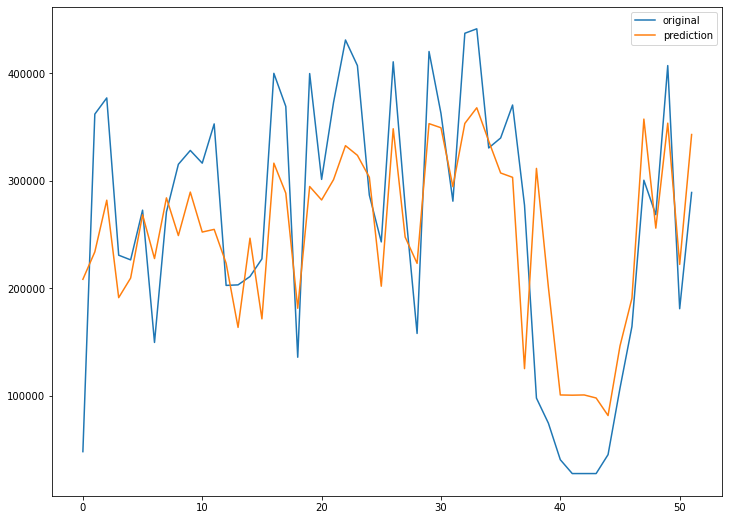

In [103]:
plt.figure(figsize=(12, 9))
plt.plot(y_test1, label='original')
plt.plot(y_pred, label='prediction')
plt.legend()
plt.show()

## 기상청 일출 일몰 데이터를 접목한다면 더욱더 좋은 예측